# Task 1: Setting the Baseline 
## Task 1.1 Data Preparation and Validation Pipeline

In [1]:
import pandas as pd 
import numpy as np

df_raw_train = pd.read_csv("./kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_train.csv")
df_raw_test = pd.read_csv("./kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_test.csv")

### Visualize few trajectories

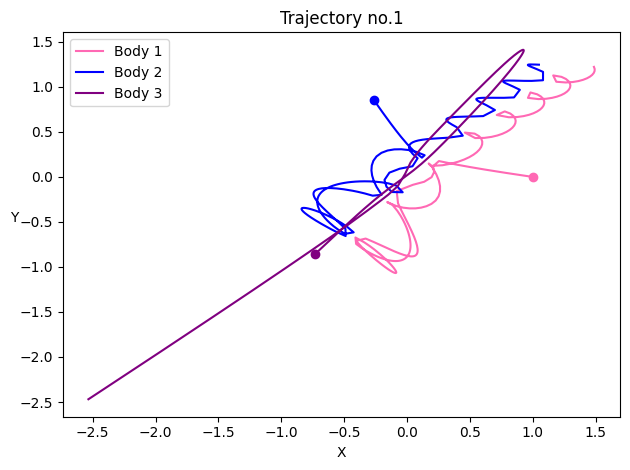

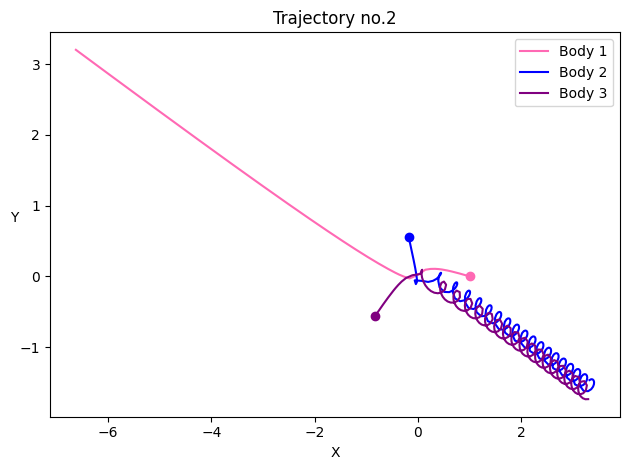

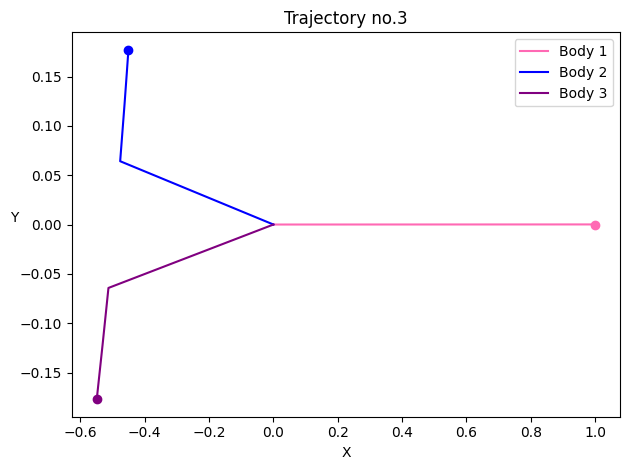

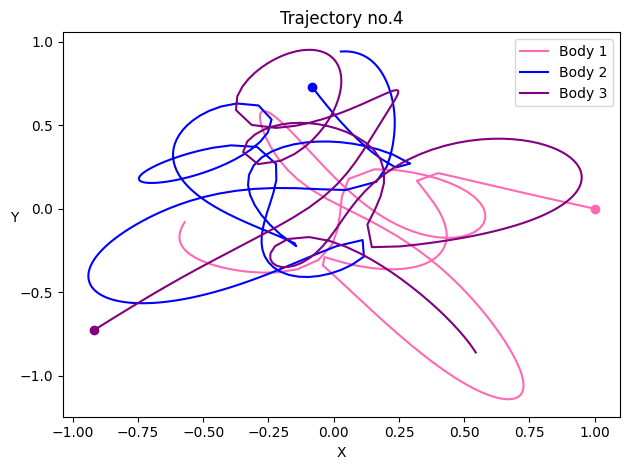

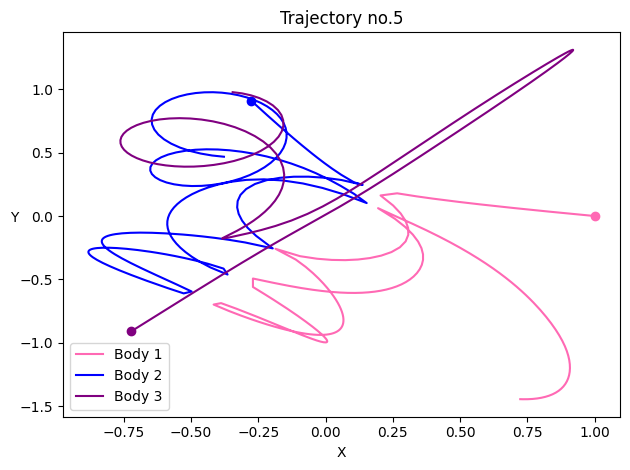

In [2]:
import matplotlib.pyplot as plt

start = 0
end = 257

for i in range(5):
    trajectory = df_raw_train[start:end]
    x1, y1, x2, y2, x3, y3 = trajectory.x_1, trajectory.y_1, trajectory.x_2, trajectory.y_2, trajectory.x_3, trajectory.y_3
    plt.plot(x1, y1, color="hotpink", label = "Body 1")
    plt.plot(x2, y2, color="blue", label = "Body 2")
    plt.plot(x3, y3, color="purple", label = "Body 3")
    plt.scatter(x1[start], y1[start], color="hotpink")
    plt.scatter(x2[start], y2[start], color="blue")
    plt.scatter(x3[start], y3[start], color="purple")
    plt.xlabel("X")
    plt.ylabel("Y", rotation=0)
    plt.title("Trajectory no." + str(i+1))
    plt.legend()
    plt.tight_layout()
    plt.show()

    start += 257
    end += 257


### Prepare the dataset

In [3]:
df_raw_train["group"] = df_raw_train["Id"]//257

In [4]:
#All starting positions
df_init = df_raw_train[ df_raw_train.index%257 == 0]

In [5]:
df_combined = df_raw_train.merge(df_init, on="group",  suffixes=('', '_init'))

# Step 1: Create a list/array of unique group_ids
unique_groups = df_combined['Id_init'].unique()

# Step 2: Create a random mask for this list
mask_train_test = np.random.rand(len(unique_groups)) < 0.8  # random True/False values

# Step 3: Split unique groups into two sets
group_train = unique_groups[mask_train_test]  # groups for the training set
group_testing = unique_groups[~mask_train_test]  # groups for the test set

# Step 4: Use the mask to split the DataFrame
train_set = df_combined[df_combined['Id_init'].isin(group_train)]
testing_set = df_combined[df_combined['Id_init'].isin(group_testing)]


unique_groups1 = testing_set['Id_init'].unique()

mask_val_test = np.random.rand(len(unique_groups1)) < 0.5

group_validation = unique_groups1[mask_val_test]  # groups for the training set
group_test = unique_groups1[~mask_val_test]  # groups for the test set

validation_set = testing_set[testing_set['Id_init'].isin(group_validation)]
test_set = testing_set[testing_set['Id_init'].isin(group_test)]



In [6]:
train_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284481,9.843750,-0.932575,-2.334208,0.656761,-2.165135,-1.022670,-2.212383,-0.735155,1.948568,1.955245,...,0.0,-0.112039,0.505901,0.0,0.0,-0.887961,-0.505901,0.0,0.0,1284229
1284482,9.882810,-0.918159,-2.401290,0.194456,-1.405421,-1.040137,-2.153735,-0.272290,1.190154,1.958296,...,0.0,-0.112039,0.505901,0.0,0.0,-0.887961,-0.505901,0.0,0.0,1284229
1284483,9.921880,-0.913998,-2.448691,0.037030,-1.050570,-1.047328,-2.114718,-0.114306,0.836599,1.961326,...,0.0,-0.112039,0.505901,0.0,0.0,-0.887961,-0.505901,0.0,0.0,1284229
1284484,9.960940,-0.914413,-2.484791,-0.051593,-0.809496,-1.049921,-2.086951,-0.025127,0.596815,1.964333,...,0.0,-0.112039,0.505901,0.0,0.0,-0.887961,-0.505901,0.0,0.0,1284229


In [7]:
validation_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
2313,0.000000,1.000000,0.000000,0.000000,0.000000,-0.295683,0.250215,0.000000,0.000000,-0.704317,...,0.0,-0.295683,0.250215,0.0,0.0,-0.704317,-0.250215,0.0,0.0,2313
2314,0.039062,0.999315,0.000046,-0.035066,0.002334,-0.296412,0.248714,-0.037392,-0.076999,-0.702904,...,0.0,-0.295683,0.250215,0.0,0.0,-0.704317,-0.250215,0.0,0.0,2313
2315,0.078125,0.997259,0.000182,-0.070230,0.004627,-0.298623,0.244179,-0.076184,-0.155594,-0.698636,...,0.0,-0.295683,0.250215,0.0,0.0,-0.704317,-0.250215,0.0,0.0,2313
2316,0.117188,0.993826,0.000406,-0.105590,0.006835,-0.302402,0.236514,-0.117969,-0.237594,-0.691424,...,0.0,-0.295683,0.250215,0.0,0.0,-0.704317,-0.250215,0.0,0.0,2313
2317,0.156250,0.989006,0.000714,-0.141249,0.008915,-0.307905,0.225543,-0.164799,-0.325309,-0.681102,...,0.0,-0.295683,0.250215,0.0,0.0,-0.704317,-0.250215,0.0,0.0,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284738,9.843750,-0.408051,-0.012284,1.189426,-0.815697,-0.424418,-0.404970,-0.307460,1.010425,0.832469,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486
1284739,9.882810,-0.361738,-0.049591,1.169348,-1.114156,-0.435557,-0.359714,-0.249920,1.326808,0.797296,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486
1284740,9.921880,-0.318596,-0.101519,0.993035,-1.583569,-0.441999,-0.299089,-0.032856,1.816586,0.760596,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486
1284741,9.960940,-0.292853,-0.176693,0.083473,-2.268009,-0.429385,-0.214368,0.920770,2.524340,0.722238,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486


In [8]:
test_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
6425,0.000000,1.000000,0.000000,0.000000,0.000000,-0.128823,0.624951,0.000000,0.000000,-0.871177,...,0.0,-0.128823,0.624951,0.0,0.0,-0.871177,-0.624951,0.0,0.0,6425
6426,0.039062,0.999413,0.000160,-0.030062,0.008189,-0.128607,0.624418,0.011096,-0.027267,-0.870806,...,0.0,-0.128823,0.624951,0.0,0.0,-0.871177,-0.624951,0.0,0.0,6425
6427,0.078125,0.997650,0.000640,-0.060214,0.016400,-0.127956,0.622820,0.022232,-0.054598,-0.869694,...,0.0,-0.128823,0.624951,0.0,0.0,-0.871177,-0.624951,0.0,0.0,6425
6428,0.117188,0.994706,0.001442,-0.090544,0.024657,-0.126869,0.620151,0.033450,-0.082055,-0.867838,...,0.0,-0.128823,0.624951,0.0,0.0,-0.871177,-0.624951,0.0,0.0,6425
6429,0.156250,0.990573,0.002567,-0.121146,0.032983,-0.125341,0.616407,0.044794,-0.109705,-0.865232,...,0.0,-0.128823,0.624951,0.0,0.0,-0.871177,-0.624951,0.0,0.0,6425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,9.843750,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284996,9.882810,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284997,9.921880,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284998,9.960940,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743


### Verify dataset splitting

In [9]:
# Get sorted unique Id_init values
unique_sorted_ids_train = sorted(set(train_set['Id_init'].values))
unique_sorted_ids_val = sorted(set(validation_set['Id_init'].values))
unique_sorted_ids_test = sorted(set(test_set['Id_init'].values))

# Find intersection of the two sets
intersection_ids1 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_val))
intersection_ids2 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_test))
intersection_ids3 = sorted(set(unique_sorted_ids_test) & set(unique_sorted_ids_val))

# Display the results]
print("Intersection of IDs:", intersection_ids1)
print("Intersection of IDs:", intersection_ids2)
print("Intersection of IDs:", intersection_ids3)

Intersection of IDs: []
Intersection of IDs: []
Intersection of IDs: []


In [10]:
input_train = train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_validation = validation_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_test = test_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_submission = df_raw_test.drop(columns=["Id"]).rename(columns={"t": "t", "x0_1": "x_1_init", "y0_1": "y_1_init", "x0_2": "x_2_init", "y0_2": "y_2_init", "x0_3": "x_3_init", "y0_3": "y_3_init"})
input_submission.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
0,0.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
1,0.039062,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
2,0.078125,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
3,0.117188,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
4,0.156250,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085


In [11]:
input_validation.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
2313,0.000000,1.0,0.0,-0.295683,0.250215,-0.704317,-0.250215
2314,0.039062,1.0,0.0,-0.295683,0.250215,-0.704317,-0.250215
2315,0.078125,1.0,0.0,-0.295683,0.250215,-0.704317,-0.250215
2316,0.117188,1.0,0.0,-0.295683,0.250215,-0.704317,-0.250215
2317,0.156250,1.0,0.0,-0.295683,0.250215,-0.704317,-0.250215


In [12]:
output_train = train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
output_validation = validation_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
output_test = test_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]

output_train.head()

,x_1,y_1,x_2,y_2,x_3,y_3
0,1.000000,0.000000,-0.266467,0.859196,-0.733533,-0.859196
1,0.999548,0.000092,-0.266261,0.858781,-0.733287,-0.858874
2,0.998190,0.000370,-0.265641,0.857535,-0.732549,-0.857905
3,0.995925,0.000833,-0.264606,0.855456,-0.731318,-0.856289
4,0.992747,0.001483,-0.263154,0.852540,-0.729592,-0.854022


In [13]:
output_validation.head()


,x_1,y_1,x_2,y_2,x_3,y_3
2313,1.000000,0.000000,-0.295683,0.250215,-0.704317,-0.250215
2314,0.999315,0.000046,-0.296412,0.248714,-0.702904,-0.248759
2315,0.997259,0.000182,-0.298623,0.244179,-0.698636,-0.244361
2316,0.993826,0.000406,-0.302402,0.236514,-0.691424,-0.236920
2317,0.989006,0.000714,-0.307905,0.225543,-0.681102,-0.226257


In [14]:
groups = train_set["group"]
groups

0             0
1             0
2             0
3             0
4             0
           ... 
1284481    4997
1284482    4997
1284483    4997
1284484    4997
1284485    4997
Name: group, Length: 1015921, dtype: int64

#### Function to save predictions to csv


In [15]:
def save_predictions_to_csv(predictions: np.ndarray, output_file_name: str):

    """
    Saves the given NumPy array with predictions to a CSV file.

    Parameters:
    - predictions (np.ndarray): A NumPy array containing the data to be saved.
    - output_file_name (str): The name of the output CSV file (without .csv extension).
    """

    predictions_df = pd.DataFrame(predictions, columns=["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"])
    predictions_df.insert(0, 'Id', range(len(predictions_df)))
    predictions_df.to_csv("./output/csv/"+output_file_name+".csv", index=False)

## Task 1.2 Learn the baseline model

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(random_state=1, max_iter=3)
svm = SVR(kernel="linear")
model = LinearRegression()
modelRidge = Ridge()
modelLasso = Lasso()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", modelRidge)
    ])
pipe

Pipeline(steps=[('scaling', StandardScaler()), ('model', Ridge())])

In [18]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GroupKFold

    
pipe.fit(input_train, output_train)
y_hat = pipe.predict(input_validation)
y_hat_test = pipe.predict(input_test)
y_hat_submission = pipe.predict(input_submission)
save_predictions_to_csv(y_hat_test, "baseline_test")
save_predictions_to_csv(y_hat_submission, "baseline-model")
rmse = root_mean_squared_error(output_validation, y_hat)
rmse_test = root_mean_squared_error(output_test, y_hat_test)

print("RMSE: ", rmse)
print("RMSE Test: ", rmse_test)

RMSE:  1.25839445388409
RMSE Test:  1.324664610701702


In [19]:
import numpy as np

def plot_y_yhat(y_validation, y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_validation) > MAX:
        idx = np.random.choice(len(y_validation),MAX, replace=False)
    else:
        idx = np.arange(len(y_validation))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_validation[idx,i])
        x1 = np.max(y_validation[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_validation[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.suptitle(plot_title)
    plt.savefig("./output/plots/"+plot_title+'.pdf')
    plt.show()

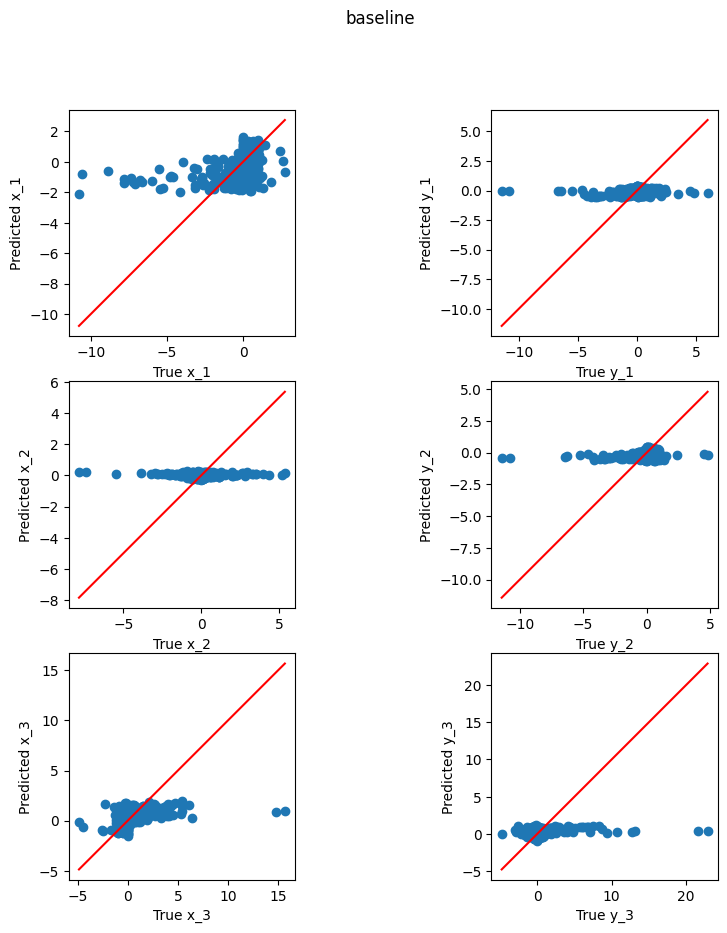

In [20]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy(), plot_title="baseline")


# Task 2: Nonlinear models on the data — the Polynomial Regression model
## Task 2.1 Development

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import root_mean_squared_error

def validate_poly_regression(X_train, y_train, X_val, y_val, regressor=None, degrees=range(1,10), max_features=None):
    
    best_rsme = 1000
    best_degree = 0
    train_scores = []
    validation_scores = []
    n_features_list = []

    for d in degrees:
        print("Degree ", d)

        pipe_d_degree= Pipeline(
    [       ('preprocessor', PolynomialFeatures(degree=d)),
            ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
    ])

        pipe_d_degree.fit(X_train, y_train)

        n_features = pipe_d_degree.named_steps['preprocessor'].n_output_features_
        n_features_list.append(n_features)

        y_train_predict = pipe_d_degree.predict(X_train)
        y_val_predict = pipe_d_degree.predict(X_val)


        train_error = root_mean_squared_error(y_train, y_train_predict)
        # print("Train RMSE:", train_error)

        val_error = root_mean_squared_error(y_val, y_val_predict)
        print("Val RMSE:", val_error)

        if val_error < best_rsme:
            best_rsme = val_error
            best_degree = d

        train_scores.append(train_error)
        validation_scores.append(val_error)

    return train_scores, validation_scores, best_rsme, best_degree, n_features_list

In [22]:
degrees=range(1,9)
degree_scores = {d: {'train_scores': [], 'test_scores': []} for d in degrees}
best_rsmes = []
best_degrees = []

for _ in range(10):

    sample_train_set = train_set.sample(frac=0.01)
    sample_input_train = sample_train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
    sample_output_train = sample_train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
    
    train_scores, validation_scores, best_rsme, best_degree, n_features_list = validate_poly_regression(sample_input_train, sample_output_train, input_validation, output_validation, degrees=degrees)

    best_rsmes.append(best_rsme)
    best_degrees.append(best_degree)

    for d in degrees:
        degree_scores[d]['train_scores'].append(train_scores[d-1])
        degree_scores[d]['test_scores'].append(validation_scores[d-1])

# Save best RMSEs and degrees to CSV
df_best = pd.DataFrame({
    'best_degree': best_degrees,
    'best_rsme': best_rsmes
})
df_best.to_csv('./output/csv/PR_best_rsme_degrees.csv', index=False)

Degree  1
Val RMSE: 1.2592714784042824
Degree  2
Val RMSE: 1.2384376999278581
Degree  3
Val RMSE: 1.2066766131419446
Degree  4
Val RMSE: 1.1753647702296837
Degree  5
Val RMSE: 534.0586755522551
Degree  6
Val RMSE: 58557.84750433514
Degree  7


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Create bin edges so that each bar is centered on its respective integer
bin_edges = [i - 0.5 for i in range(1, len(degrees) + 2)]  # Create bin edges

plt.hist(best_degrees, bins=bin_edges, color='pink', edgecolor='black')

plt.xticks(range(1, len(degrees) + 1))

plt.title('Distribution of Selected Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.show()
plt.savefig("./output/plots/PR_best_degrees_hist.pdf")

In [ ]:
plt.plot(best_rsmes, color='hotpink')
plt.title('RMSE throughout 10 runs')
plt.xlabel('# of run')
plt.ylabel('RMSE')
plt.show()
plt.savefig("./output/plots/PR_best_rsmes.pdf")

### Train with the best-degree model


In [ ]:
best_degree_ever = max(set(best_degrees), key=best_degrees.count)

print("Best degree", best_degree_ever)

pipe_best_degree= Pipeline(
[       ('preprocessor', PolynomialFeatures(degree=best_degree_ever)),
        ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

pipe_best_degree.fit(input_train, output_train)

output_train_predict = pipe_best_degree.predict(input_train)
output_val_predict = pipe_best_degree.predict(input_validation)
output_test_predict = pipe_best_degree.predict(input_test)
output_submission_predict = pipe_best_degree.predict(input_submission)

save_predictions_to_csv(output_test_predict, "poly_test")
save_predictions_to_csv(output_submission_predict, "polynomial_submission")

train_error = root_mean_squared_error(output_train, output_train_predict)
print("Train RMSE:", train_error)

val_error = root_mean_squared_error(output_validation, output_val_predict)
print("Validation RMSE:", val_error)

## Task 2.2 Evaluation

In [ ]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(output_val_predict).to_numpy(), plot_title="polynomial")

# Task 3: Feature Engineering
## Task 3.1 Removing variables

## Task 3.2 Evaluation of Variable Reduction

## Task 3.3 Adding Variables

## Task 3.4 Evaluation of Variable Augmentation

# Task 4: Nonparamentric Model — the k-Nearest Neighbors Regressor
## Task 4.1 Development

In [106]:
    
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import time

In [111]:
analytics = []
def validate_knn_regression(X_train, y_train, X_val, y_val, k=range(1,15)):
    for n_neighbors in k:
        pipe = Pipeline(
            [
                    ('scaling', StandardScaler()), 
                    ("model", KNeighborsRegressor(n_neighbors=n_neighbors))
            ])
        start_time = time.time()

        pipe.fit(X_train, y_train)
        y_hat = pipe.predict(X_val)
        elapsed_time = time.time() - start_time
        rmse = root_mean_squared_error(y_hat, y_val)

        print(f'k: {n_neighbors} with RMSE: {rmse}, time: {elapsed_time}')
        analytics.append([n_neighbors, rmse, elapsed_time])

validate_knn_regression(input_train, output_train, input_validation, output_validation, k=range(1,15))

k: 1 with RMSE: 1.239779432811127, time: 2.92041277885437
k: 2 with RMSE: 1.2341755310440876, time: 2.95808482170105
k: 3 with RMSE: 1.23357451829384, time: 2.8636488914489746
k: 4 with RMSE: 1.221730880228143, time: 3.0467658042907715
k: 5 with RMSE: 1.2189442475778838, time: 3.028074026107788
k: 6 with RMSE: 1.2052331099715623, time: 3.083444118499756
k: 7 with RMSE: 1.2012451753013773, time: 3.0915231704711914
k: 8 with RMSE: 1.1927540020217016, time: 3.1922640800476074
k: 9 with RMSE: 1.1829368314981692, time: 3.3272531032562256
k: 10 with RMSE: 1.1773597191042133, time: 3.4689321517944336
k: 11 with RMSE: 1.1749791210706735, time: 3.455198049545288
k: 12 with RMSE: 1.1708460313383573, time: 3.545771837234497
k: 13 with RMSE: 1.1665304378385697, time: 3.541581153869629
k: 14 with RMSE: 1.1648244185136205, time: 3.735821008682251


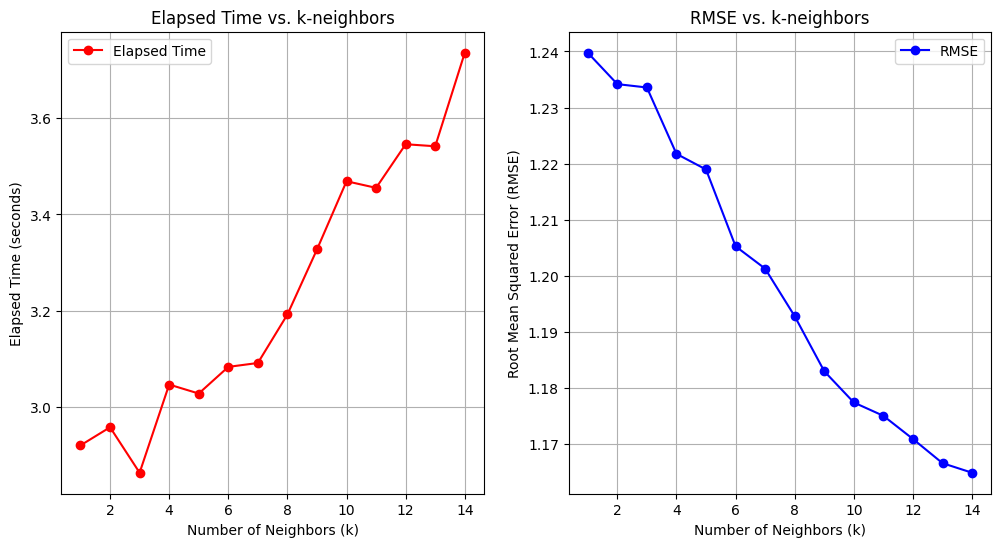

In [112]:
# Extract data for plotting
k_values = [item[0] for item in analytics]
rmse_values = [item[1] for item in analytics]
time_values = [item[2] for item in analytics]

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot elapsed time vs. k-neighbors
plt.subplot(1, 2, 1)
plt.plot(k_values, time_values, marker='o', linestyle='-', color='r', label='Elapsed Time')
plt.title('Elapsed Time vs. k-neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Elapsed Time (seconds)')
plt.grid(True)
plt.legend()

# Plot RMSE vs. k-neighbors
plt.subplot(1, 2, 2)
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b', label='RMSE')
plt.title('RMSE vs. k-neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.legend()
plt.savefig("./output/plots/knn.pdf")
plt.show()

In [ ]:
pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", KNeighborsRegressor(n_neighbors=14, weights='distance',
                                                  algorithm='brute', n_jobs=-1))
    ])

pipe.fit(input_train, output_train)
y_hat = pipe.predict(input_validation)
y_hat_test = pipe.predict(input_test)
y_hat_submission = pipe.predict(input_submission)
save_predictions_to_csv(y_hat_test, "knn_test")
save_predictions_to_csv(y_hat_submission, "knn_submission")
rmse = root_mean_squared_error(output_validation, y_hat)
rmse_test = root_mean_squared_error(output_test, y_hat_test)

print("RMSE: ", rmse)
print("RMSE Test: ", rmse_test)
print(f'k: {13} with RMSE: {rmse}')


## Task 4.2 Evaluation

In [ ]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy(), plot_title="knn_yhat")

# Task 5 [Optional]

#### 5.1 LightGBM

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb

pipe = Pipeline(
    [
        ('scaling', StandardScaler()), 
        ('model', MultiOutputRegressor(lgb.LGBMRegressor(num_leaves=31, learning_rate=0.01, n_estimators=100, num_iterations=100)))
    ]
)

pipe

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 MultiOutputRegressor(estimator=LGBMRegressor(learning_rate=0.01,
                                                              num_iterations=100)))])

In [88]:

model.fit(input_train, output_train)


/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 1025430, number of used features: 6
[LightGBM] [Info] Start training from score -0.273656


/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 1025430, number of used features: 6
[LightGBM] [Info] Start training from score -0.116853


/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 1025430, number of used features: 6
[LightGBM] [Info] Start training from score 0.002890


/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 1025430, number of used features: 6
[LightGBM] [Info] Start training from score -0.088432


/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 1025430, number of used features: 6
[LightGBM] [Info] Start training from score 0.270766


/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 1025430, number of used features: 6
[LightGBM] [Info] Start training from score 0.205285


MultiOutputRegressor(estimator=LGBMRegressor(learning_rate=0.01,
                                             num_iterations=1000,
                                             num_leaves=50))

In [89]:
y_hat = model.predict(input_validation)
y_hat_test = model.predict(input_test)
y_hat_submission = model.predict(input_submission)
save_predictions_to_csv(y_hat_test, "lgbm_test")
save_predictions_to_csv(y_hat_submission, "lgbm_submission")
rmse = root_mean_squared_error(output_validation, y_hat)
rmse_test = root_mean_squared_error(output_test, y_hat_test)

print("RMSE: ", rmse)
print("RMSE Test: ", rmse_test)
print(f'LightGBM with RMSE: {rmse}')

RMSE:  1.193891951724333
RMSE Test:  0.8177928253561119
LightGBM with RMSE: 1.193891951724333


#### 5.2 Neural Networks

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.neural_network import MLPRegressor

pipe = Pipeline(
    [
        ('scaling', StandardScaler()), 
        ('model', MLPRegressor(
            alpha=0.01,
            solver='adam',
            random_state=1, 
            max_iter=4000,
            activation='relu',
            hidden_layer_sizes=(100, 1000, 1000, 100, 100, 100, 100,100, 100)
        ))
    ]
)

pipe

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 MLPRegressor(alpha=0.01,
                              hidden_layer_sizes=(100, 1000, 1000, 100, 100,
                                                  100, 100, 100, 100),
                              max_iter=4000, random_state=1))])

In [24]:
pipe.fit(input_train, output_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 MLPRegressor(alpha=0.01,
                              hidden_layer_sizes=(100, 1000, 100, 100, 100, 100,
                                                  100, 100),
                              max_iter=2000, random_state=1))])

In [26]:
y_hat = pipe.predict(input_validation)
y_hat_test = pipe.predict(input_test)
y_hat_submission = pipe.predict(input_submission)
save_predictions_to_csv(y_hat_test, "nn_test")
save_predictions_to_csv(y_hat_submission, "nn_submission")
rmse = root_mean_squared_error(output_validation, y_hat)
rmse_test = root_mean_squared_error(output_test, y_hat_test)

print("RMSE: ", rmse)
print("RMSE Test: ", rmse_test)
print(f'NeuralNetworks with RMSE: {rmse}')

RMSE:  0.7588627084858538
RMSE Test:  0.9960753890126411
NeuralNetworks with RMSE: 0.7588627084858538


#### AutoML

In [ ]:
import autosklearn

model = autosklearn.regression.AutoSklearnRegressor(
    memory_limit=80048,
    time_left_for_this_task=60*30,
    per_run_time_limit=60*30/10,
    tmp_folder="./tmp/autosklearn_regression_example_tmp",
    n_jobs=-1,
    ensemble_size=0,
    metric=autosklearn.metrics.mean_squared_error
)
model.fit(input_train, output_train)


In [ ]:
model.leaderboard()

In [ ]:
y_hat = model.predict(input_validation)
y_hat_test = model.predict(input_test)
y_hat_submission = model.predict(input_submission)
save_predictions_to_csv(y_hat_test, "automl_test")
save_predictions_to_csv(y_hat_submission, "automl_submission")
rmse = root_mean_squared_error(output_validation, y_hat)
rmse_test = root_mean_squared_error(output_test, y_hat_test)
print("RMSE: ", rmse)
print("RMSE Test: ", rmse_test)
print(f'Automl with RMSE: {rmse}')